****************Print the Plot****************


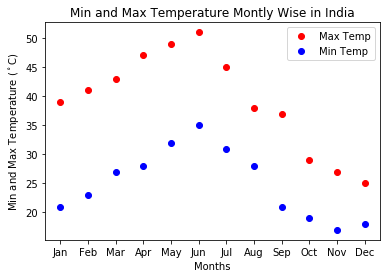

****************Print Plot the fit****************


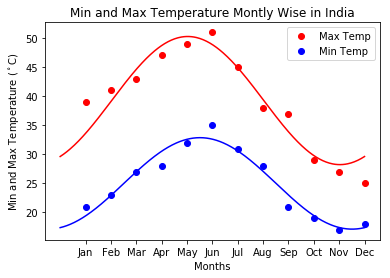

In [94]:
#Assignment 10 by Sreedhara Jagatagar  Sreenivasa
#Scipy:
#We have the min and max temperatures in a city In India for each months of the year.
#We would like to find a function to describe this and show it graphically, the dataset
#given below.
#Task:
#1. fitting it to the periodic function
#2. plot the fit
#Data
#Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25
#Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

#Import required Libraray
import numpy as np
import pandas as pd
from scipy import linalg as linAlg
from scipy import optimize as opt
import matplotlib.pyplot as plt


#Define Array to store Months, Min and Max Temperature.
max_temp=np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
min_temp=np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])
month_name=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
months =list(range(1,13))

#Fitting it to the periodic function and call Optmize's Curve_Fit Functions
def yearly_temps(times, avg, ampl, time_offset):
    return (avg + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))
res_max, cov_max = opt.curve_fit(yearly_temps, months, max_temp, [50,40,30])
res_min, cov_min = opt.curve_fit(yearly_temps, months, min_temp, [20,30,40])

#Define the Plot and print
print ('****************Print the Plot****************')
plt.plot(months,max_temp,'ro',label='Max Temp')
plt.plot(months,min_temp,'bo',label='Min Temp')
plt.xticks(months,month_name)
plt.xlabel('Months')
plt.ylabel('Min and Max Temperature ($^\circ$C)')
plt.title('Min and Max Temperature Montly Wise in India')
plt.legend()
plt.show()

print ('****************Print Plot the fit****************')
days = np.linspace(0, 12, num=365)

#define the plot to fit using the periodic function
plt.figure()
plt.plot(months, max_temp, 'ro',label='Max Temp')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months, min_temp, 'bo', label='Min Temp')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
#Lable both x , Y axiss , and Title and also convert month into Month Name.
plt.xticks(months,month_name)
plt.xlabel('Months')
plt.ylabel('Min and Max Temperature ($^\circ$C)')
plt.title('Min and Max Temperature Montly Wise in India')
#show the legend
plt.legend()
plt.show()

In [95]:
#Assignment 10 by Sreedhara Jagatagar  Sreenivasa
#Matplotlib:
#This assignment is for visualization using matplotlib:
#data to use: url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv
#titanic = pd.read_csv(url)
#Charts to plot:
#1. Create a pie chart presenting the male/female proportion
#2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

import pandas as pd
import matplotlib.pyplot as plt

#Read Data
url='https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'
titanic_df = pd.read_csv(url)
titanic_df.head(2)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"


In [96]:
titanic_df_working =titanic_df

Male Count = 843
Female Count = 466


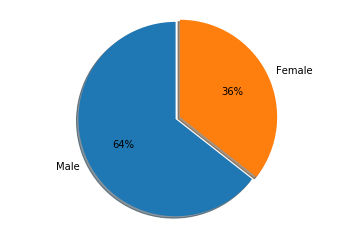

In [97]:
#Assignment 10 by Sreedhara Jagatagar  Sreenivasa
#1. Create a pie chart presenting the male/female proportion

#Derive male and Female Count
MaleCount=titanic_df_working.loc[(titanic_df_working.sex=='male')].sex.count()
FeMaleCount=titanic_df_working.loc[(titanic_df_working.sex=='female')].sex.count()

#print male and female count
print('Male Count =',MaleCount)
print('Female Count =',FeMaleCount)

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['Male', 'Female']
sizes = [MaleCount, FeMaleCount]
explode = (0.05,0)  # only "explode" the 2nd slice (i.e. 'Hogs')

#a pie chart presenting the male/female proportion
fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels,explode=explode, autopct='%1.0f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

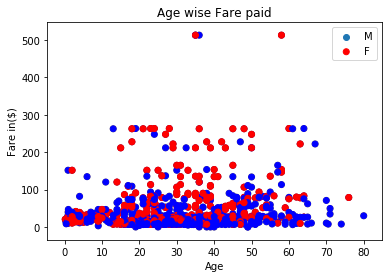

In [100]:
#Assignment 10 by Sreedhara Jagatagar  Sreenivasa
#2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

#1st Solution
# Delete Null Rows
titanic_df_working = titanic_df_working.dropna(subset=['sex'])

#Declare and asssign age, Fare and Sex
x=titanic_df_working.age
y=titanic_df_working.fare
z=pd.factorize(titanic_df_working['sex'])[0]

#a scatterplot with the Fare paid and the Age, differ the plot color by gender
plt.scatter(x,y,c=z)

# 2nd Solution
#Declare and asssign age, Fare and Sex
Age=titanic_df_working.age
Fare=titanic_df_working.fare
mapping = {'male' : 'blue', 'female' : 'red'}
Sex=titanic_df_working['sex'].map(mapping)

#a scatterplot with the Fare paid and the Age, differ the plot color by gender
plt.title('Age wise Fare paid')
plt.xlabel('Age')
plt.ylabel('Fare in($)')
plt.scatter(Age,Fare,c=Sex)
plt.legend('MF')
plt.show()